# 0. Pre-run GPU Check

In [2]:
!nvidia-smi

Sun Apr 30 20:07:12 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti      On | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P3               17W /  30W|    481MiB /  4096MiB |     40%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1. Install Dependencies and Setup

In [3]:
!pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:010m
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.21.0 requires blinker>=1.0.0, which is not installed.


In [4]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
altair                        4.2.2
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
aniso8601                     9.0.1
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
arviz                         0.12.1
astroid                       2.13.2
astropy                       5.1
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.1
attrs                         22.2.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall

In [5]:
import tensorflow as tf
import os

2023-04-30 20:07:23.718982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 20:07:25.149733: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-30 20:07:25.149891: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-30 20:07:25.149901: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-04-30 20:07:26.690735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-30 20:07:26.888857: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-04-30 20:07:26.888894: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'assets/data' 

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('./assets/data')

Found 305 files belonging to 2 classes.


2023-04-30 20:07:34.040780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

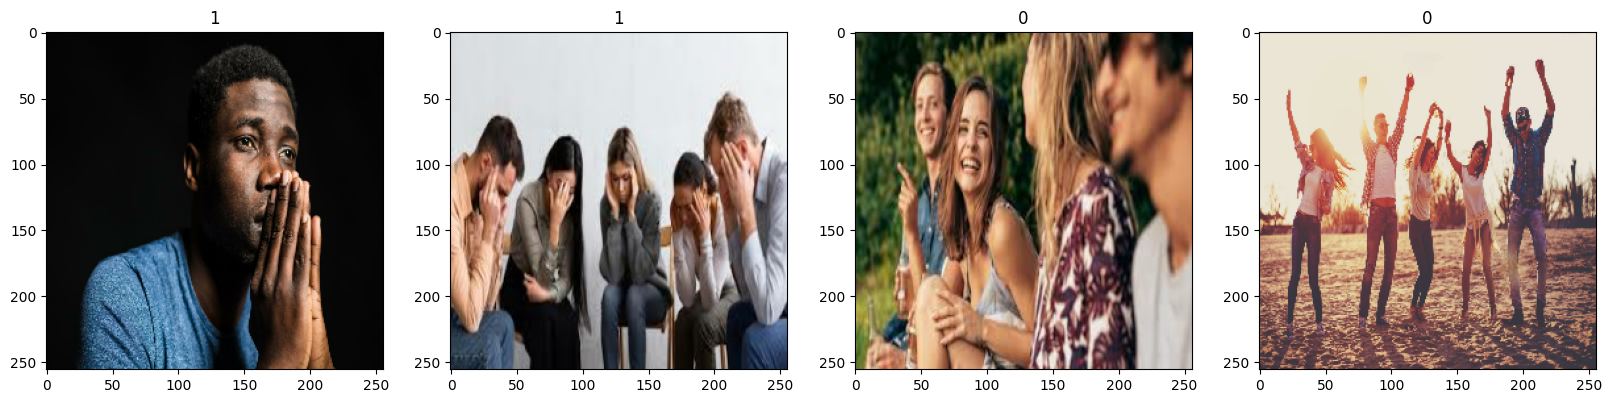

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [18]:
data.as_numpy_iterator().next()

(array([[[[0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          ...,
          [0.45490196, 0.47058824, 0.5176471 ],
          [0.4509804 , 0.46666667, 0.5137255 ],
          [0.44705883, 0.4627451 , 0.50980395]],
 
         [[0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          ...,
          [0.45490196, 0.47058824, 0.5176471 ],
          [0.4509804 , 0.46666667, 0.5137255 ],
          [0.44705883, 0.4627451 , 0.50980395]],
 
         [[0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          ...,
          [0.45490196, 0.47058824, 0.5176471 ],
          [0.4509804 , 0.46666667, 0.5137255 ],
          [0.44705883, 0.4627451 , 0.50980395]],
 
         ...,
 
         [[0.03529412, 0.03529412, 0.03529412],
          [0.03529

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

7

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [28]:
logdir='./assets/logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 1.1503 - accuracy: 0.4955 - val_loss: 0.6816 - val_accuracy: 0.7344
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6593 - accuracy: 0.5446 - val_loss: 0.5998 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.5949 - accuracy: 0.6830 - val_loss: 0.5569 - val_accuracy: 0.6094
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.5898 - accuracy: 0.6741 - val_loss: 0.5269 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.4528 - accuracy: 0.8259 - val_loss: 0.5750 - val_accuracy: 0.7031
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.4023 - accuracy: 0.7991 - val_loss: 0.3346 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 8s 991ms/step - loss: 0.3000 - accuracy: 0.9152 - val_loss: 0.2867 - val_accuracy: 0.9688
Epoch 8/20
7/7 [====================

# 8. Plot Performance

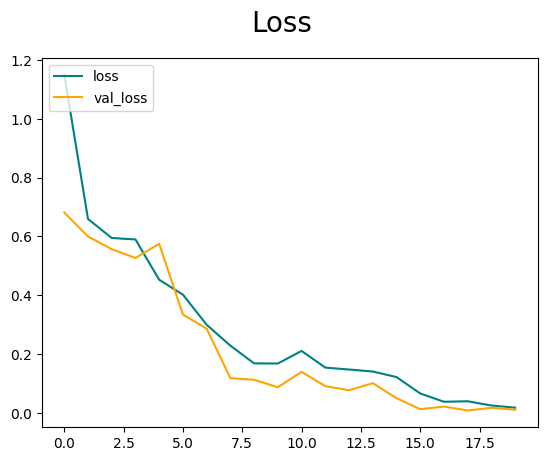

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

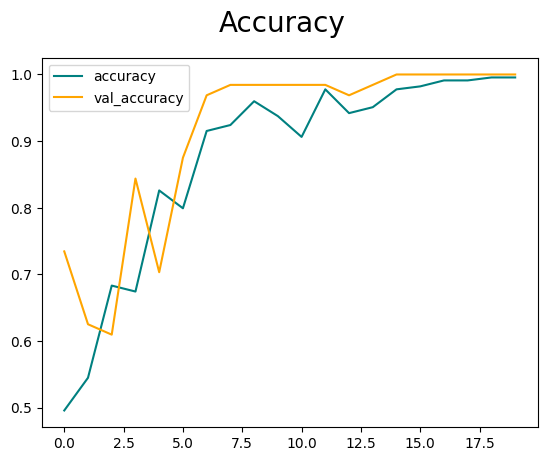

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 183ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [37]:
import cv2

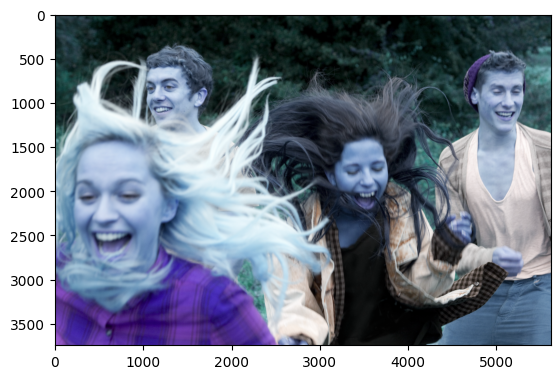

In [38]:
img = cv2.imread('./assets/test-images/154006829.jpg')
plt.imshow(img)
plt.show()

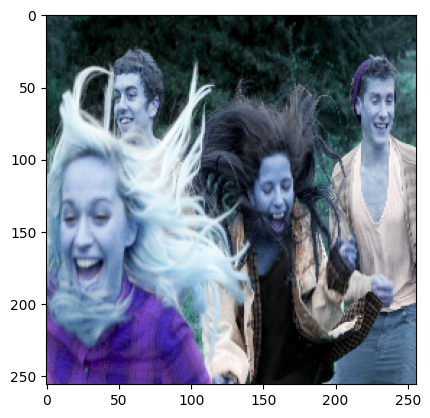

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 15ms/step


In [41]:
yhat

array([[0.81463903]], dtype=float32)

In [42]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [43]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models','image-classifier.h5'))

In [48]:
new_model = load_model('./models/image-classifier.h5')

In [49]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 58ms/step


array([[0.81463903]], dtype=float32)